# **Iterative Prompt Development**
In this lesson, you'll iteratively analyze and refine your prompts to generate marketing copy from a product fact sheet.

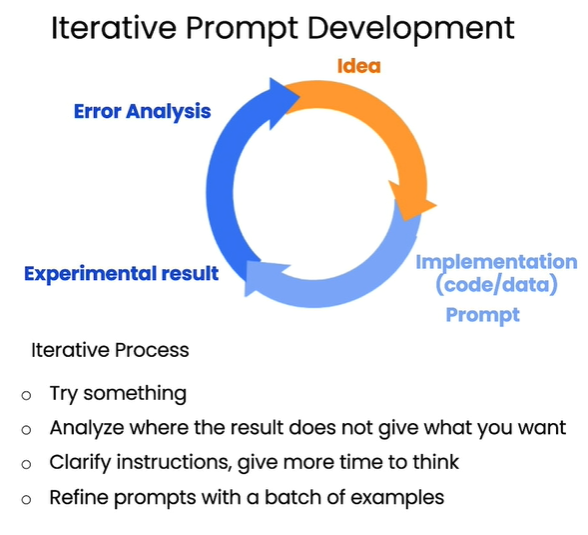

In [16]:
from PIL import Image
im = Image.open("../img/Iterative.png")
display(im)

## Setup

In [36]:
from openai import OpenAI
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

OPENAI_API_KEY  = os.getenv('OPENAI_API_KEY')

In [38]:
client = OpenAI(
    # This is the default and can be omitted
    api_key=OPENAI_API_KEY,
)

def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message.content 

## Generate a marketing product description from a product fact sheet

In [41]:
fact_sheet_chair = """
OVERVIEW
- Part of a beautiful family of mid-century inspired office furniture, 
including filing cabinets, desks, bookcases, meeting tables, and more.
- Several options of shell color and base finishes.
- Available with plastic back and front upholstery (SWC-100) 
or full upholstery (SWC-110) in 10 fabric and 6 leather options.
- Base finish options are: stainless steel, matte black, 
gloss white, or chrome.
- Chair is available with or without armrests.
- Suitable for home or business settings.
- Qualified for contract use.

CONSTRUCTION
- 5-wheel plastic coated aluminum base.
- Pneumatic chair adjust for easy raise/lower action.

DIMENSIONS
- WIDTH 53 CM | 20.87”
- DEPTH 51 CM | 20.08”
- HEIGHT 80 CM | 31.50”
- SEAT HEIGHT 44 CM | 17.32”
- SEAT DEPTH 41 CM | 16.14”

OPTIONS
- Soft or hard-floor caster options.
- Two choices of seat foam densities: 
 medium (1.8 lb/ft3) or high (2.8 lb/ft3)
- Armless or 8 position PU armrests 

MATERIALS
SHELL BASE GLIDER
- Cast Aluminum with modified nylon PA6/PA66 coating.
- Shell thickness: 10 mm.
SEAT
- HD36 foam

COUNTRY OF ORIGIN
- Italy
"""

In [43]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)


Introducing the SWC-100/SWC-110 Office Chair, a stylish and versatile addition to any workspace. This chair is part of a stunning collection of mid-century inspired office furniture, offering a cohesive look with filing cabinets, desks, bookcases, meeting tables, and more.

Choose from a variety of shell colors and base finishes to customize your chair to suit your style. The SWC-100 model features plastic back and front upholstery, while the SWC-110 model offers full upholstery in a selection of 10 fabric and 6 leather options. With base finish options including stainless steel, matte black, gloss white, or chrome, you can create a chair that perfectly complements your space.

Constructed with a 5-wheel plastic coated aluminum base and a pneumatic chair adjust for easy raise/lower action, this chair is not only stylish but also functional. The dimensions of the chair are as follows: WIDTH 53 CM | 20.87”, DEPTH 51 CM | 20.08”, HEIGHT 80 CM | 31.50”, SEAT HEIGHT 44 CM | 17.32”, SEAT DEP

## Issue 1: The text is too long 
- Limit the number of words/sentences/characters.

In [46]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)


Introducing our versatile and stylish office chair, part of a mid-century inspired furniture collection. Choose from a variety of colors, finishes, and upholstery options to suit your space. With a durable construction and adjustable features, this chair is perfect for both home and business use. Made in Italy.


In [48]:
len(response)

312

## Issue 2. Text focuses on the wrong details
- Ask it to focus on the aspects that are relevant to the intended audience.

In [51]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Introducing our versatile and stylish office chair, part of a mid-century inspired furniture collection. Constructed with a durable cast aluminum shell and base coated with modified nylon, this chair offers comfort with HD36 foam seating. Choose from a variety of upholstery and base finishes to suit any space. Made in Italy.


In [52]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Introducing our versatile office chair, part of a stylish mid-century inspired collection. Choose from a variety of shell colors and base finishes to suit your space. Constructed with a durable aluminum base and high-density foam seat for comfort. Perfect for home or office use. Product IDs: SWC-100, SWC-110.


## Issue 3. Description needs a table of dimensions
- Ask it to extract information and organize it in a table.

In [54]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

After the description, include a table that gives the 
product's dimensions. The table should have two columns.
In the first column include the name of the dimension. 
In the second column include the measurements in inches only.

Give the table the title 'Product Dimensions'.

Format everything as HTML that can be used in a website. 
Place the description in a <div> element.

Technical specifications: ```{fact_sheet_chair}```
"""

response = get_completion(prompt)
print(response)

<div>
<p>This mid-century inspired office chair is a perfect addition to any home or business setting. With a variety of shell colors and base finishes to choose from, you can customize it to fit your style. The chair is available with plastic back and front upholstery or full upholstery in a range of fabric and leather options. The 5-wheel plastic coated aluminum base ensures stability, while the pneumatic chair adjust allows for easy height adjustments. Made with high-quality materials like cast aluminum with modified nylon coating and HD36 foam, this chair is not only stylish but also durable. Choose between soft or hard-floor casters and two seat foam densities to make it your own. Made in Italy, this chair is designed to last.</p>

<p>Product IDs: SWC-100, SWC-110</p>
</div>

<table>
  <caption>Product Dimensions</caption>
  <tr>
    <th>Dimension</th>
    <th>Measurements (inches)</th>
  </tr>
  <tr>
    <td>Width</td>
    <td>20.87"</td>
  </tr>
  <tr>
    <td>Depth</td>
    <td

## Load Python libraries to view HTML

In [57]:
from IPython.display import display, HTML
display(HTML(response))

Dimension,Measurements (inches)
Width,"20.87"""
Depth,"20.08"""
Height,"31.50"""
Seat Height,"17.32"""
Seat Depth,"16.14"""
